In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
# geodata source
gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'

# name corrected data source
nc_src = '../well_data/src_data.csv'

In [3]:
geodata = gpd.read_file(gd_src.format('mou', 'mou'))
wells = pd.read_csv(nc_src)
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868678 entries, 0 to 868677
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   div     868678 non-null  object 
 1   dis     868678 non-null  object 
 2   upa     868678 non-null  object 
 3   uni     868678 non-null  object 
 4   mou     868678 non-null  object 
 5   depth   868678 non-null  float64
 6   as      868678 non-null  float64
dtypes: float64(2), object(5)
memory usage: 46.4+ MB


In [4]:
# gplt.polyplot(
#     geodata, 
#     projection=gcrs.AlbersEqualArea(), 
#     edgecolor='blue', 
#     linewidth=0.05,
#     figsize=(12,12)
# )

               mou  mou_count
0  Abda Hossainpur         31
1      Abdul Mahal          9
2       Abdul Nabi        271
3      Abdullahpur        294
4       Abdullapur        213


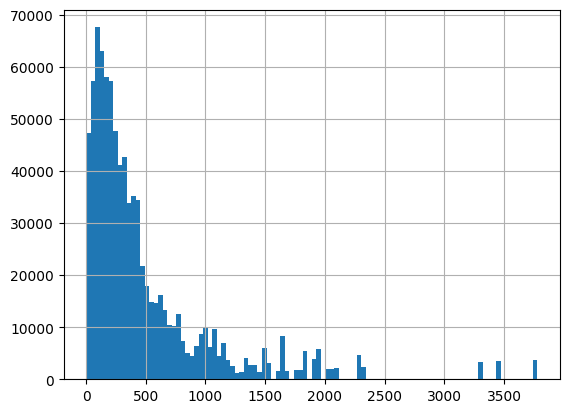

In [5]:
def chittagong_color_count(df):
    df_agg = df.groupby(df['mou'], as_index=False).count()
    df_agg['mou_count'] = df_agg['depth']
    df_agg.drop(columns=['depth'])
    
    print(df_agg[['mou', 'mou_count']].head())
    
    df['mou_count'] = pd.merge(
        df_agg[['mou', 'mou_count']],
        df,
        on='mou'
    )['mou_count']
    
    scaler = MinMaxScaler(feature_range=(0.1, 1))
    
    # Mou Wells_scaled
    df['mw_scaled'] = scaler.fit_transform(df[['mou_count']])
    df['mou_count'].hist(bins=100)

    return

chittagong_color_count(wells)